Feature Engineering(to increase the accuracy)
1. q1 len = character length of question1
2. q2 len = character length of question2
3. q1 words = number of words in question1
4. q2 words = number of words in question2
5. words common = number of common unique words
6. words total = total number of words in question1 + total number of words in question2
7. word share = (word coomon/word total)

we form these 7 coloumns and add 3000 bow of q1 and that of q2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('train.csv')

In [5]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
401939,401939,535386,535387,What's the best alternative to SAP?,What are the best alternative to SAP?,1
300530,300530,46956,33028,Which are the best SEO companies in Delhi?,"What is the best SEO company in Delhi, India?",1
107283,107283,176538,176539,"Was Donald Trump truthful when he said ""No, I ...",Was Donald Trump telling the truth about not k...,1
168229,168229,260643,260644,What are some examples of poor customer service?,What is bad customer service? What are example...,1
92747,92747,155212,155213,Is there any chance of decrease in the cut off...,I have gotten a 75% in both class 10 and 12. W...,0


In [7]:
new_df = df.sample(30000, random_state=2)

In [9]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [11]:
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate
306427,306427,87103,247799,What does Pattern do?,What is Z-Pattern?,0
128427,128427,162936,206542,How are the different types of nerve cells for...,What are different types of cells?,0
370363,370363,49275,500922,What is the best optical illusion?,How does this optical illusion work?,0
143763,143763,73669,227700,What's the best home remedy for ear mites in c...,What is the best home remedy for a toddler vom...,0
172995,172995,266979,266980,What is the influence of Christianity in the I...,What is the influence of Islam in the Indian i...,0


In [13]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [15]:
new_df.duplicated().sum()

0

is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

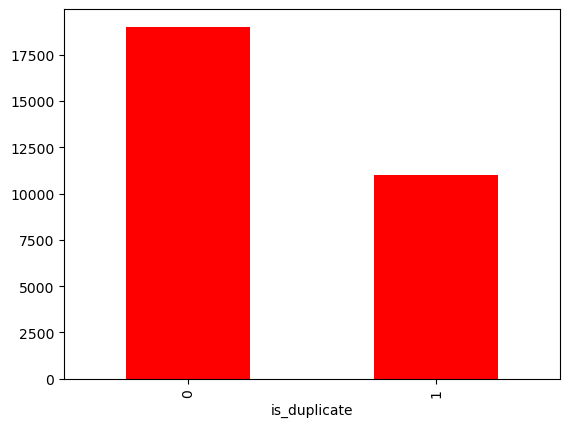

In [17]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100) #in percentage value
new_df['is_duplicate'].value_counts().plot(kind='bar',color='red')

In [19]:
#repeated questions
qid= pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions in the dataset:',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions that are being repeated in the dataset:',x[x].shape[0])

Number of unique questions in the dataset: 55299
Number of questions that are being repeated in the dataset: 3480


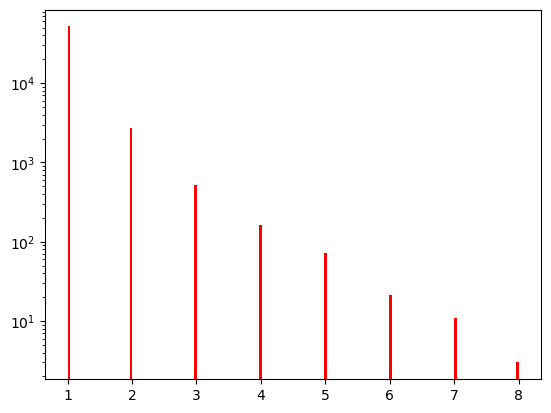

In [21]:
#plot(histogram) of repeated questions
plt.hist(qid.value_counts().values,bins=160, color='red')
plt.yscale('log')
plt.show()

In [23]:
#Feature Engineering
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [25]:
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
133195,133195,213114,213115,Is Donald Trump a marketing genius?,Is Donald Trump a business genius?,1,35,34
259324,259324,244071,186335,What is the difference between true love and a...,What is the difference between attachment and ...,1,56,51
553,553,1104,1105,What are the best daily life hacks one can use...,What are the hacks in daily life?,1,69,33
329748,329748,69883,77372,Why is life so unfair for some people?,Why is life so unfair?,1,38,22
13386,13386,25711,25712,How do I get to contact a hacker?,How do I contact a verified hacker?,1,33,35


In [27]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
130826,130826,209877,209878,How can you find out the exact day you posted ...,Haven't been able to post a picture on my Inst...,0,69,134,13,28
183649,183649,5757,60106,Is it possible to gain height after 20?,Will swimming increase height after 20 years o...,1,39,52,8,9
4653,4653,9191,9192,Where can I get best fire protection services ...,Where can I get emergency fire protection serv...,1,56,60,10,10
86753,86753,146251,146252,Which two modernist writers are most fit for c...,Who was the most copied writer ever?,0,56,36,9,7
107831,107831,177311,177312,What do vegetarians think about non-vegetarians?,What do vegans think about non vegetarians?,1,48,43,6,7


In [29]:
# get common words
def common_words(row): #pura row pass kiya
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) #ques1 k sare words
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) #quest2 k sare words
    return len(w1 & w2) #intersection among the two

In [31]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
59730,59730,104579,47042,What is the best Android tablet apps?,What is the best Android tablet browser?,0,37,40,7,7,6
217595,217595,323996,323997,What are your choices for the best personal de...,What are the best personality development books?,0,62,48,10,7,6
300,300,600,601,How should I start small business effectively?,How should I start a small business in constru...,0,46,52,7,9,6
313015,313015,437555,437556,What are the best headhunters in Mexico?,Who are the best headhunters in Mexico?,1,40,39,7,7,6
91635,91635,153519,153520,How many keywords are there in the CFML progra...,How many keywords are there in ArcView 3.x Pro...,0,83,86,14,14,11


In [33]:
def total_words(row): #pura row pass kiya
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" "))) #ques1 k sare words
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" "))) #quest2 k sare words
    return (len(w1) + len(w2)) #intersection among the two

In [35]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
329127,329127,455758,202280,How can I download the PDF book 'Strength Of M...,Which are the best sites to download pdf books...,0,74,52,13,10,3,23
361130,361130,490935,154432,What language should I learn before C#?,Which programming language should I learn afte...,0,39,59,7,9,4,16
96123,96123,160174,160175,What is the land ordinance bill?,What is a land ordinance bill?,1,32,30,6,6,5,12
9891,9891,19207,19208,How can I become an affiliate marketer?,What is an affiliate marketer? How do you beco...,0,39,53,7,10,5,17
20542,20542,38750,38751,PHP is good or bad?,"Is PHP really bad, even with good frameworks l...",1,19,59,5,10,3,15


In [37]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
363827,363827,2374,32200,Why do so may people ask questions on Quora th...,Why do so many people ask google-able question...,1,94,57,19,10,7,29,0.24
257129,257129,372387,33713,What is a better option: Physical education or...,What's the best laptop I can buy as a CS student?,0,91,49,16,11,1,27,0.04
15954,15954,30441,30442,Sarcasm: What are the best sarcastic replies?,"Is it advisable that we write ""sarcasm intende...",0,45,109,7,19,2,26,0.08
313806,313806,11616,91902,Why do people believe in flat earth?,Why do people say the earth is flat when we ha...,1,36,91,7,19,4,23,0.17
240058,240058,103102,351807,What piano chords go together?,Which is harder to play in a song on piano: ar...,0,30,62,5,13,0,18,0.00


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 2
maximum characters 391
average number of characters 59


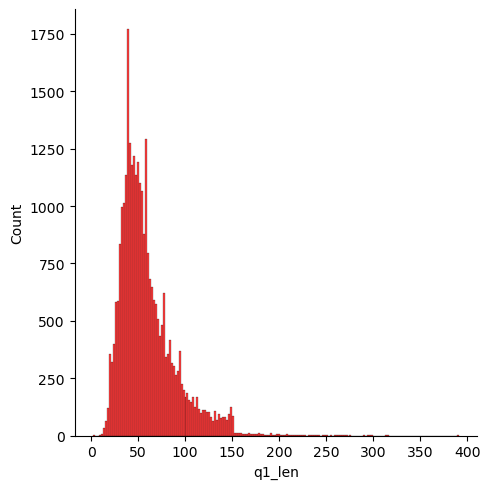

In [39]:
#analysis of features
sns.displot(new_df['q1_len'],color='red')
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average number of characters',int(new_df['q1_len'].mean()))

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 6
maximum characters 1151
average number of characters 60


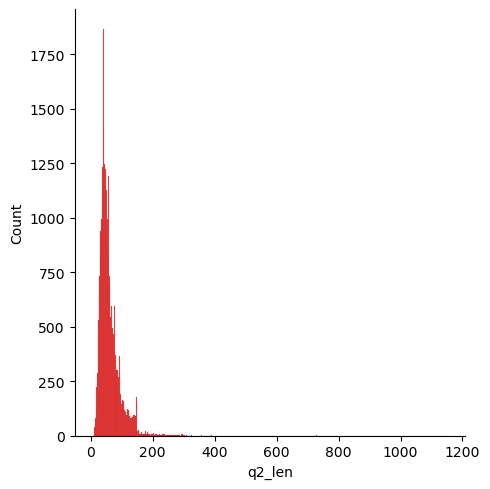

In [41]:
sns.displot(new_df['q2_len'],color='red')
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average number of characters',int(new_df['q2_len'].mean()))

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 72
average number of characters 10


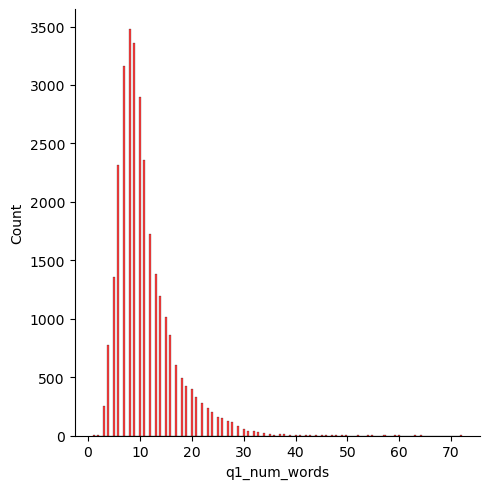

In [43]:
sns.displot(new_df['q1_num_words'],color='red')
print('minimum characters',new_df['q1_num_words'].min())
print('maximum characters',new_df['q1_num_words'].max())
print('average number of characters',int(new_df['q1_num_words'].mean()))

C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


minimum characters 1
maximum characters 237
average number of characters 11


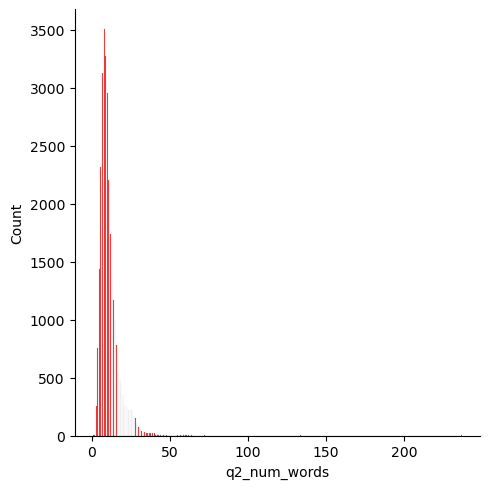

In [45]:
sns.displot(new_df['q2_num_words'],color='red')
print('minimum characters',new_df['q2_num_words'].min())
print('maximum characters',new_df['q2_num_words'].max())
print('average number of characters',int(new_df['q2_num_words'].mean()))

C:\Users\Dell\AppData\Local\Temp\ipykernel_6096\3998256111.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_6096\3998256111.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

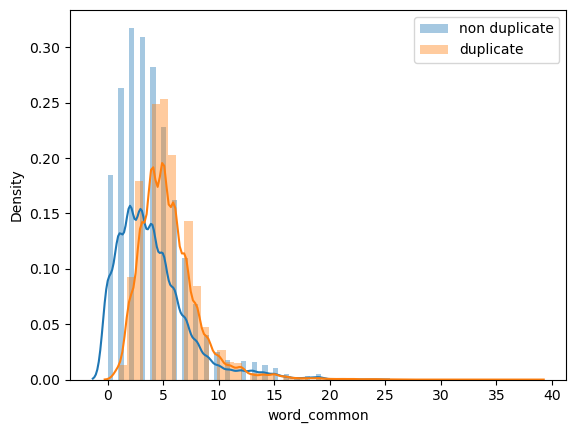

In [46]:
#common words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6096\3878293330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_6096\3878293330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

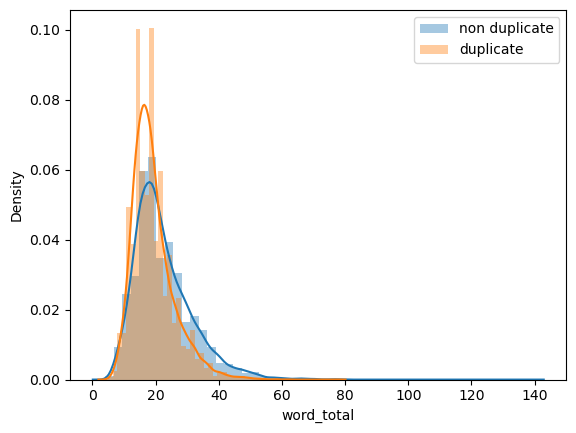

In [49]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6096\3475357463.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\AppData\Local\Temp\ipykernel_6096\3475357463.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displo

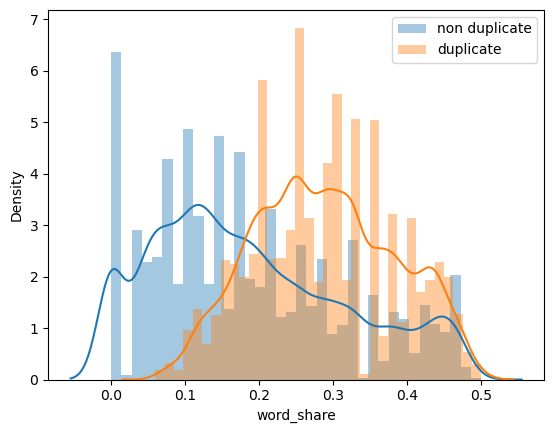

In [51]:
#word share
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [53]:
ques_df = new_df[['question1','question2']]
ques_df.sample(5)

,question1,question2
92148,Our farm in Kentucky is being invaded by moles...,What is the best way to get rid of scorpions?
128244,I am not happy with my life?,What should I do if I am not happy in my life?
27706,Narendra Modi: How is Mr. Narendra Modi in per...,Arvind Kejriwal: How is Mr. Kejriwal in person...
80245,If you no longer love your girlfriend or boyfr...,My girlfriend said she doesn't know what she w...
274219,Email address of Shri Narendra Modi?,What is Shri Narendra Modi's e-mail address?


In [55]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.sample(5)

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
151349,0,63,43,12,9,5,20,0.25
223045,0,60,69,9,10,4,19,0.21
315084,0,39,38,8,9,7,17,0.41
324964,0,17,32,4,6,1,10,0.10
122698,0,67,38,16,8,4,23,0.17


In [57]:
#BOW
from sklearn.feature_extraction.text import CountVectorizer
#merge text
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [58]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index) #into dataframe
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2], axis=1) #and concatinate them
temp_df.shape # 6000 features since 3000 for question1 and 3000 for question2

(30000, 6000)

In [61]:
final_df = pd.concat([final_df, temp_df],axis=1)
print(final_df.shape)
final_df.sample(5)

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
55714,0,56,139,10,24,4,30,0.13,0,0,...,0,0,0,0,0,0,0,0,0,0
366376,1,70,52,13,9,7,20,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
243893,0,49,32,11,7,7,17,0.41,0,0,...,0,0,0,0,0,0,0,0,0,0
130370,0,97,64,17,14,8,29,0.28,0,0,...,0,0,0,0,0,0,0,0,0,0
229842,1,42,36,10,9,6,19,0.32,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:,1:].values, final_df.iloc[:,0].values, test_size=0.2, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7661666666666667

In [65]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.764
